# Coursera Capstone
## Regression with Keras
In this Notebook we will see an example of application of Regression Algorithm in Deep Learning using Keras.

*Keras is a high-level API for building deep learning models. It has gained favor for its ease of use and syntactic simplicity facilitating fast development.*

We will use concrete data as dataset.

In [1]:
# Let's import libraries
import pandas as pd #library for analysis 
import keras #library for deep learning
from sklearn.model_selection import train_test_split #train and split dataset

## Library to build the model
from keras.models import Sequential 
from keras.layers import Dense

from sklearn.metrics import mean_squared_error ## model evaluation

import statistics ## library for statistics

%matplotlib inline

Using TensorFlow backend.
/Users/claudiocalamita/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/claudiocalamita/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/claudiocalamita/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/claudio

In [2]:
#Let's import the dataset
!wget https://cocl.us/concrete_data

--2020-04-28 12:16:54--  https://cocl.us/concrete_data
Resolving cocl.us... 159.8.72.228, 159.8.69.24, 159.8.69.21
Connecting to cocl.us|159.8.72.228|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv [following]
--2020-04-28 12:16:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58988 (58K) [text/csv]
Saving to: 'concrete_data.1'

concrete_data.1     100%[===================>]  57.61K   269KB/s    in 0.2s    

2020-04-28 12:16:56 (269 KB/s) - 'concrete_data.1' saved [58988/58988]



**The dataset is imported in a dataframe using Pandas**

In [3]:
df = pd.read_csv("concrete_data")

**Let's give a look to the dataframe**

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

**The dataframe consists of 9 variables and 1030 samples**

Now let's give a look to the statistical description of the dataframe

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4339f6d0>,
      dtype=object)

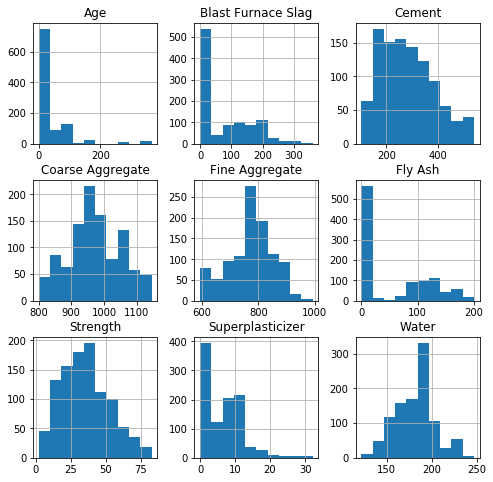

In [7]:
# We can do a hist to see the distributions of data
df.hist(figsize = (8, 8))

In [8]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

**There is no missing value!**

# A. Build a baseline model

### Let's build the network

In [9]:
# define regression model with 1 hidden layer of 10 nodes
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Divide the dataframe in the features and in the target variable. 
The target variable is the Strength

In [10]:
df_columns = df.columns

X = df[df_columns[df_columns != 'Strength']] # all columns except Strength
y = df['Strength'] # Strength column

### Train the model


In order to train and test the model let's use the **train_test_split** method from scikit-learn

In [11]:
X_train, X_test, y_train, y_test = train_test_split( 
         X, y, test_size=0.3, random_state=1)

In [12]:
# build the model
n_cols = X.shape[1]
model = regression_model()
model.fit(X_train, y_train, epochs=50, verbose=0)

Let's calculate the mean squared error between predicted concrete strength and the actual conctrete strength using model evaluation and Scikit-Learn

In [13]:
## mse using model evaluation
mse_model = model.evaluate(X_test, y_test)
mse_model

309/309 [==============================] - 0s 387us/step


120.39385964106587

In [14]:
## mse using sklearn

## First calculate the predicted value 
y_predicted = model.predict(X_test)

## Calculate mean squared error
mse = mean_squared_error(y_test, y_predicted)
mse

120.39386004993375

### Let's create a statistics of mse

In [15]:
def pipelineToGetMseCollection(X, y, num):
    mse_coll = []
    for i in range(0, 50):
        ## Train test Split
        X_train, X_test, y_train, y_test = train_test_split( 
                 X, y, test_size=0.3)

        ## build the model
        model.fit(X_train, y_train, epochs = num, verbose=0)

        ## mse
        y_predicted = model.predict(X_test)
        mse = mean_squared_error(y_test, y_predicted)

        ## append data
        mse_coll.append(mse)
    return mse_coll

Mean = 68.2 and Standard Deviation = 26.5


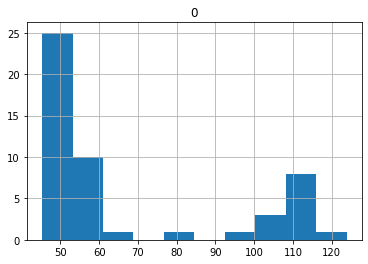

In [16]:
# Get Collection of MSE
mse_collection = pipelineToGetMseCollection(X, y, 50)

# Get Mean and STD 
mean = statistics.mean(mse_collection)
std = statistics.stdev(mse_collection)

# Plot hist
pd.DataFrame(mse_collection).hist()

# Print Mean and STD
print("Mean = {:.1f} and Standard Deviation = {:.1f}".format(mean,std))

# B. Normalize the data

In [17]:
# Function to normalize data
def normalize_dataset(predictors):
    return (predictors - predictors.mean()) / predictors.std()

Mean = 47.8 and Standard Deviation = 47.7


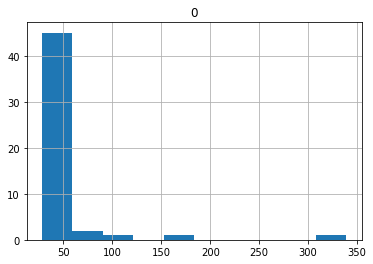

In [18]:
# Normalize data
X_normalized = normalize_dataset(X)

# Get Collection of MSE
mse_collection_normalized = pipelineToGetMseCollection(X_normalized, y, 50)

# Get Mean and STD 
mean_normalized = statistics.mean(mse_collection_normalized)
std_normalized = statistics.stdev(mse_collection_normalized)

# Plot hist
pd.DataFrame(mse_collection_normalized).hist()

# Print Mean and STD
print("Mean = {:.1f} and Standard Deviation = {:.1f}".format(mean_normalized, std_normalized))

**The mean is decreasing as absolute value, while the standard deviation is increased.**

# C. Increase the number of epochs

Mean = 32.7 and Standard Deviation = 2.6


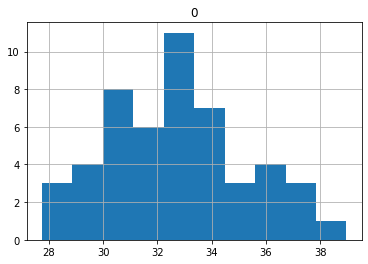

In [19]:
# Get Collection of MSE
mse_collection_normalized_epochs = pipelineToGetMseCollection(X_normalized, y, 100)

# Get Mean and STD 
mean_normalized_epochs = statistics.mean(mse_collection_normalized_epochs)
std_normalized_epochs = statistics.stdev(mse_collection_normalized_epochs)

# Plot hist
pd.DataFrame(mse_collection_normalized_epochs).hist()

# Print Mean and STD
print("Mean = {:.1f} and Standard Deviation = {:.1f}".format(mean_normalized_epochs, std_normalized_epochs))

**The data are more distributed normalizing and increasing the number of epochs and the standard deviation is reducing very much. It is a better result.**

# D. Increase the number of hidden layers

In [20]:
# define regression model with 1 hidden layer of 10 nodes
def regression_model_3Hidden():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Mean = 30.7 and Standard Deviation = 2.7


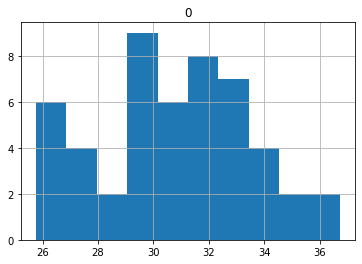

In [21]:
# Get Collection of MSE
mse_collection_normalized_hidden = pipelineToGetMseCollection(X_normalized, y, 50)

# Get Mean and STD 
mean_normalized_hidden = statistics.mean(mse_collection_normalized_hidden)
std_normalized_hidden = statistics.stdev(mse_collection_normalized_hidden)

# Plot hist
pd.DataFrame(mse_collection_normalized_hidden).hist()

# Print Mean and STD
print("Mean = {:.1f} and Standard Deviation = {:.1f}".format(mean_normalized_hidden, std_normalized_hidden))

**This is a better result respecting doing a simple normalization. It is similar to the case with 100 epochs but the distribution is more uniform. It could be a problem of statistics, maybe 50 mse is a poor statistics**